<a href="https://colab.research.google.com/github/lawakobadu/Kelompok-1-APM/blob/main/SVM_Kernel_RBF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('citrus.csv')
dataset.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [3]:
dataset.shape

(10000, 6)

In [4]:
dataset.info()
print("")
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB



name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

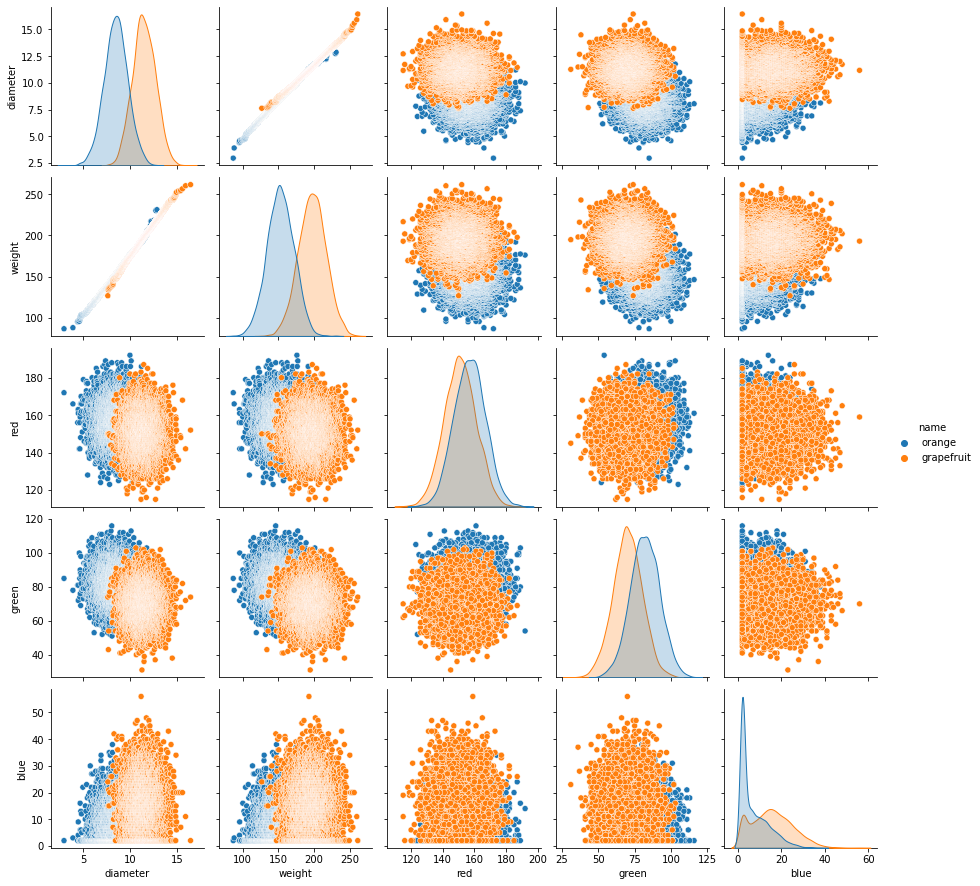

In [5]:
sns.pairplot(data=dataset, hue = 'name', kind='scatter')

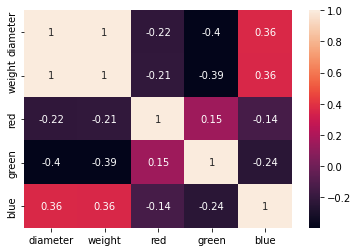

In [6]:
sns.heatmap(dataset[["diameter",'weight', 'red','green', 'blue']].corr(), annot=True)

In [7]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['name']= label_encoder.fit_transform(dataset['name'])
X = dataset.iloc[:, 1:6].values
y = dataset.iloc[:, 0].values

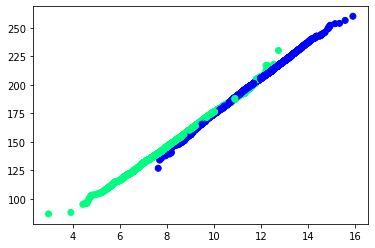

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
plt.scatter(X_train[:,0], X_train[:, 1], c=y_train, cmap='winter')

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state=0, C=100)
classifier.fit(X_train, y_train)

SVC(C=100, random_state=0)

In [11]:
from sklearn import metrics
y_pred = classifier.predict(X_test)
print("hasil akurasi :", metrics.accuracy_score(y_test,y_pred))

hasil akurasi : 0.9636


[[1216   21]
 [  70 1193]]


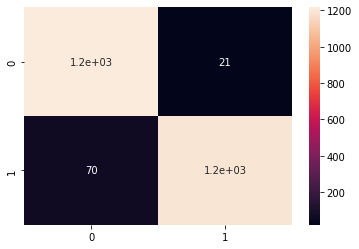

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

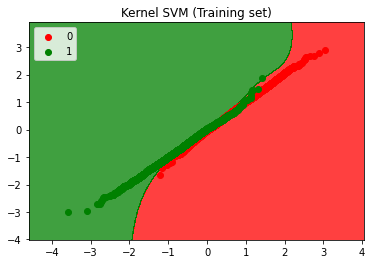

In [13]:
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(3)]).T
pred = classifier.predict(Xpred).reshape(X1.shape)
plt.contourf(X1, X2, pred,
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.legend()
plt.show()

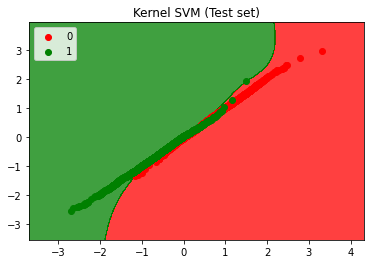

In [14]:
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(3)]).T
pred = classifier.predict(Xpred).reshape(X1.shape)
plt.contourf(X1, X2, pred,
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.legend()
plt.show()